In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc.sampling_jax
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from scipy.special import expit

plt.style.use("bmh")
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

/Users/sjack/Library/Caches/pypoetry/virtualenvs/pymc-notebooks-xRFgMF1w-py3.10/lib/python3.10/site-packages/pymc/sampling_jax.py:36: UserWarning: This module is experimental.
  warnings.warn("This module is experimental.")


<AxesSubplot:>

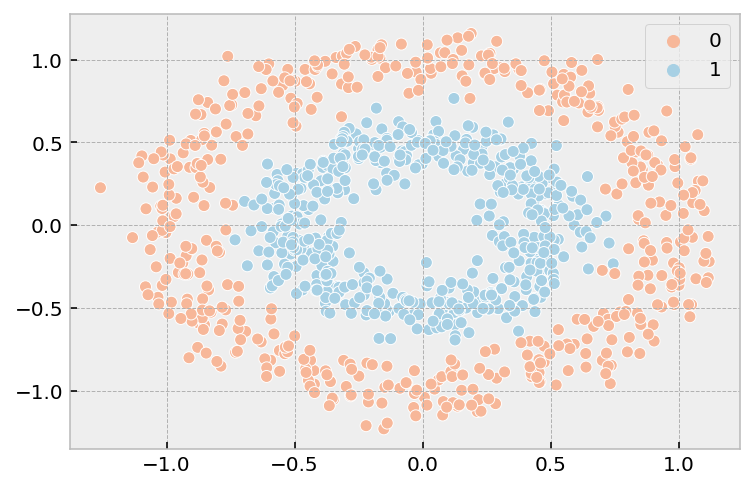

In [2]:
circles = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=RANDOM_SEED)
sns.scatterplot(x=circles[0][:, 0], y=circles[0][:, 1], hue=circles[1], palette="RdBu")

<AxesSubplot:>

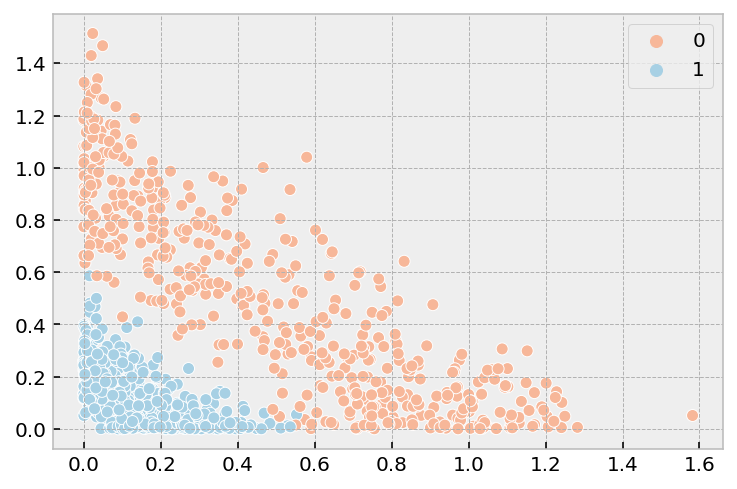

In [3]:
sns.scatterplot(x=circles[0][:, 0]**2, y=circles[0][:, 1]**2, hue=circles[1], palette="RdBu")

In [4]:
with pm.Model() as model:
    x1 = pm.MutableData("x1", circles[0][:, 0])
    x2 = pm.MutableData("x2", circles[0][:, 1])

    y = pm.MutableData("y", circles[1])

    beta0 = pm.Normal("beta0", mu=0, sigma=1)
    beta1 = pm.Normal("beta1", mu=-0.1, sigma=1)
    beta2 = pm.Normal("beta2", mu=-0.1, sigma=1)

    likelihood =  pm.invlogit(beta0 + beta1 * x1**2 + beta2 * x2**2)
    logit = pm.Bernoulli("logit", likelihood, observed=y)

pm.model_to_graphviz(model)


SyntaxError: invalid syntax (495921054.py, line 12)

In [ ]:
with model:
    priors = pm.sample_prior_predictive(samples=1000)


print(y.mean(), priors.prior_predictive.logit.mean().values)

In [ ]:
with model:
    trace = pm.sample(6000, tune=1000, target_accept=0.95, cores=-1, chains=4)

In [ ]:
pm.plot_trace(trace, var_names=["beta0", "beta1", "beta2"])

In [ ]:
with model:
    posterior = pm.sample_posterior_predictive(trace)

In [ ]:
predictions = posterior.posterior_predictive.logit.mean(axis=0).mean(axis=0)
miss = (predictions.round() != circles[1])
predictions_correct = 1 - miss.mean()
print(predictions_correct)
predictions = np.round(predictions.values * 10) / 10
ddata = pd.DataFrame({"x1": x1.get_value(), "x2": x2.get_value(), "likelihood": predictions})


In [ ]:
sns.scatterplot(data=ddata, x=circles[0][:, 0], y=circles[0][:, 1], hue="likelihood", palette="RdBu_r")